# Capturing Variables

## In this section, I will explain some special functions and tricks to do capturing variables.

Follow the steps:

1. Let's add the necessary libraries and run our work through them.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
titanic = sns.load_dataset("titanic")
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. We will capturing categorical variables, numerical variables, and categorical variables but cardinal variables by writing the grab_col_names function



In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int","float"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  all_cat_cols = cat_cols + num_but_cat
  all_cat_cols = [col for col in all_cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int","float"]]
  num_cols = [col for col in num_cols if col not in all_cat_cols]

  #Print Categorical and Numerical Variables
  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"Cat_cols: {len(all_cat_cols)}")
  print(f"Num_but_cat: {len(num_but_cat)}")
  print(f"Num_cols: {len(num_cols)}")
  print(f"Cat_but_car: {len(cat_but_car)}")

  return all_cat_cols, num_cols, cat_but_car

In [13]:
all_cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
Cat_cols: 13
Num_but_cat: 4
Num_cols: 2
Cat_but_car: 0


3. By using the list comprehensions we wrote in the previous step in a function, we get information about the categorical variables of the data over the entire data set.



In [14]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)


        sex     Ration
male    577  64.758698
female  314  35.241302
##########################################


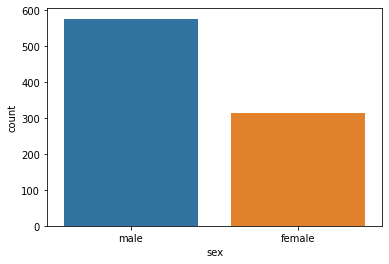

   embarked     Ration
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################


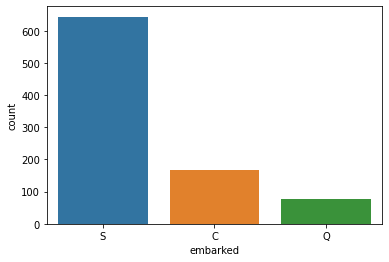

        class     Ration
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


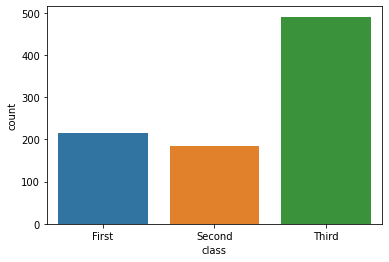

       who     Ration
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


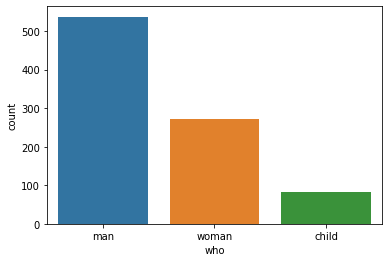

   adult_male    Ration
1         537  60.26936
0         354  39.73064
##########################################


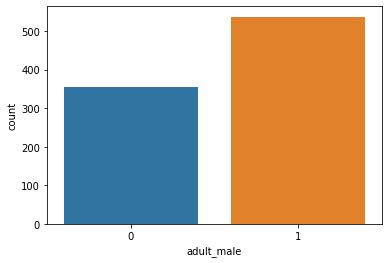

   deck    Ration
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################


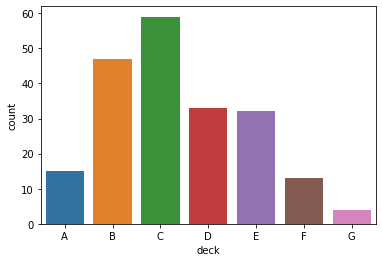

             embark_town     Ration
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


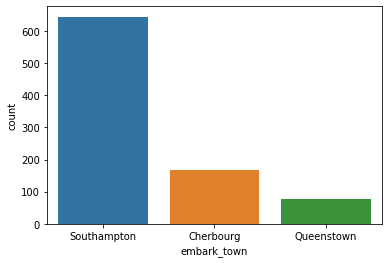

     alive     Ration
no     549  61.616162
yes    342  38.383838
##########################################


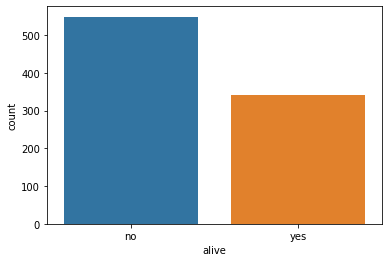

   alone    Ration
1    537  60.26936
0    354  39.73064
##########################################


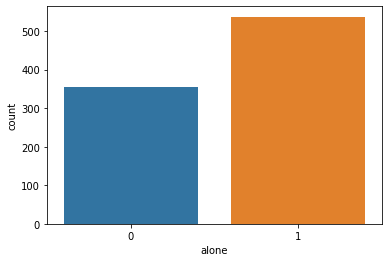

   survived     Ration
0       549  61.616162
1       342  38.383838
##########################################


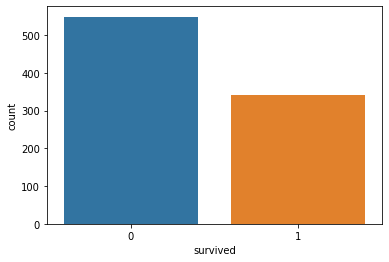

   pclass     Ration
3     491  55.106622
1     216  24.242424
2     184  20.650954
##########################################


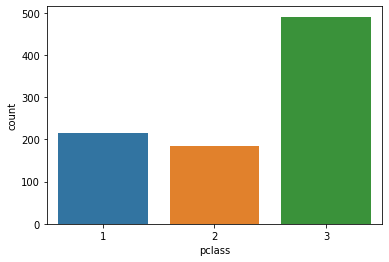

   sibsp     Ration
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
##########################################


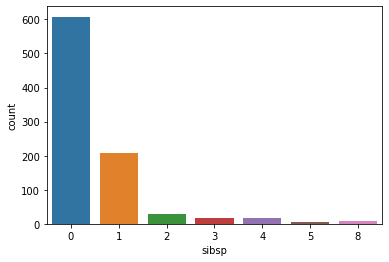

   parch     Ration
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
##########################################


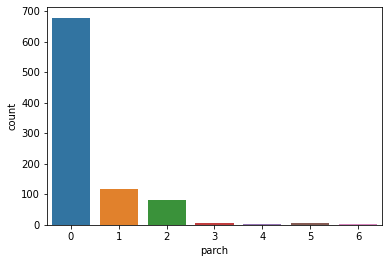

In [15]:
for col in all_cat_cols:
  if df[col].dtypes == "bool":
    df[col] = df[col].astype("int")
    cat_summary(df,col,plot=True)
  else:
    cat_summary(df,col,plot=True)
